# COVID 19 analysis

## Intro

How to install the required tools to run this?
Well, you should follow the intructions.

It would not have been possible to run this if you didn't have the notebook, but again, the instructions are in the README.md.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# set the seed
np.random.seed(1)

In [3]:
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import matplotlib.pyplot as plt

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]
plt.rcParams['figure.dpi'] = 80

import seaborn as sns

#sns.set_context("paper")
sns.set_context("notebook")
plt.style.use('seaborn-darkgrid')

In [6]:
#COVID-19/archived_data/archived_time_series
confirmed_df = pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [7]:
# Melt data with dates into rows
confirmed_data_df = confirmed_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="Date", value_name="Confirmed")
death_data_df = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="Date", value_name="Deaths")
recovered_data_df = recovered_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="Date",  value_name="Recovered")

In [8]:
confirmed_data_df

Province/State         Country/Region        Lat       Long     Date  \
0                NaN            Afghanistan  33.000000  65.000000  1/22/20   
1                NaN                Albania  41.153300  20.168300  1/22/20   
2                NaN                Algeria  28.033900   1.659600  1/22/20   
3                NaN                Andorra  42.506300   1.521800  1/22/20   
4                NaN                 Angola -11.202700  17.873900  1/22/20   
...              ...                    ...        ...        ...      ...   
15675            NaN                  Libya  26.335100  17.228331  3/25/20   
15676            NaN     West Bank and Gaza  31.952200  35.233200  3/25/20   
15677            NaN          Guinea-Bissau  11.803700 -15.180400  3/25/20   
15678            NaN                   Mali  17.570692  -3.996166  3/25/20   
15679            NaN  Saint Kitts and Nevis  17.357822 -62.782998  3/25/20   

       Confirmed  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
15675          1  
15676         -1  
15677          2  
15678          2  
15679          2  

[15680 rows x 6 columns]

In [9]:
confirmed_data_df[confirmed_data_df["Confirmed"].isna()]

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, Date, Confirmed]
Index: []

In [10]:
death_data_df[death_data_df['Deaths'].isna()]

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, Date, Deaths]
Index: []

In [11]:
recovered_data_df[recovered_data_df['Recovered'].isna()]

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, Date, Recovered]
Index: []

In [12]:
all_data_df = pd.concat([confirmed_data_df, death_data_df['Deaths'] , recovered_data_df['Recovered']], axis=1).reset_index().drop(['index'], axis=1)

In [13]:
# Add zero where we have no data
all_data_df[["Deaths", "Recovered", "Confirmed"]] = all_data_df[["Deaths", "Recovered", "Confirmed"]].apply(lambda row: row.fillna(0))

In [14]:
# Changing Date column into an actual date type
all_data_df.loc[:, "Date"] = all_data_df["Date"].apply(lambda s: pd.to_datetime(s).date())

In [15]:
latest_date = all_data_df["Date"].max()

In [16]:
confirmed_data_df.dropna(subset=["Province/State"])

Province/State  Country/Region      Lat      Long  \
8      Australian Capital Territory       Australia -35.4735  149.0124   
9                   New South Wales       Australia -33.8688  151.2093   
10               Northern Territory       Australia -12.4634  130.8456   
11                       Queensland       Australia -28.0167  153.4000   
12                  South Australia       Australia -34.9285  138.6007   
...                             ...             ...      ...       ...   
15655                     Gibraltar  United Kingdom  36.1408   -5.3536   
15656                   Isle of Man  United Kingdom  54.2361   -4.5481   
15657                    Montserrat  United Kingdom  16.7425  -62.1874   
15666              Diamond Princess          Canada   0.0000    0.0000   
15673                     Recovered          Canada   0.0000    0.0000   

          Date  Confirmed  
8      1/22/20          0  
9      1/22/20          0  
10     1/22/20          0  
11     1/22/20          0  
12     1/22/20          0  
...        ...        ...  
15655  3/25/20         26  
15656  3/25/20         23  
15657  3/25/20          1  
15666  3/25/20          0  
15673  3/25/20          0  

[4736 rows x 6 columns]

In [17]:
confirmed_df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [18]:
us_data_df = all_data_df[(all_data_df["Confirmed"] > 30) & (all_data_df["Country/Region"] == "US")].sort_values('Confirmed')

In [19]:
world_data_df = all_data_df[(all_data_df["Confirmed"] > 1000)].groupby("Country/Region").max().reset_index().sort_values('Confirmed')

In [20]:
world_data_df = world_data_df.sort_values('Recovered')

In [21]:
world_data_df

Country/Region   Province/State      Lat      Long        Date  Confirmed  \
0        Australia  New South Wales -33.8688  151.2093  2020-03-25       1029   
28          Turkey              NaN  38.9637   35.2433  2020-03-25       2433   
14          Israel              NaN  31.0000   35.0000  2020-03-25       2369   
7          Czechia              NaN  49.8175   15.4730  2020-03-25       1654   
13         Ireland              NaN  53.1424   -7.6921  2020-03-25       1564   
4           Canada           Quebec  52.9399  -73.5491  2020-03-25       1342   
3           Brazil              NaN -14.2350  -51.9253  2020-03-25       2554   
16           Japan              NaN  36.0000  138.0000  2020-03-25       1307   
9          Ecuador              NaN  -1.8312  -78.1834  2020-03-25       1173   
5            Chile              NaN -35.6751  -71.5430  2020-03-25       1142   
22        Pakistan              NaN  30.3753   69.3451  2020-03-25       1063   
23          Poland              NaN  51.9194   19.1451  2020-03-25       1051   
18      Luxembourg              NaN  49.8153    6.1296  2020-03-25       1333   
24        Portugal              NaN  39.3999   -8.2245  2020-03-25       2995   
19        Malaysia              NaN   2.5000  112.5000  2020-03-25       1796   
1          Austria              NaN  47.5162   14.5501  2020-03-25       5588   
29              US              NaN  37.0902  -95.7129  2020-03-25      65778   
20     Netherlands              NaN  52.1326    5.2913  2020-03-25       6412   
26          Sweden              NaN  63.0000   16.0000  2020-03-25       2526   
30  United Kingdom              NaN  55.3781   -3.4360  2020-03-25       9529   
21          Norway              NaN  60.4720    8.4689  2020-03-25       3084   
8          Denmark              NaN  56.2639    9.5018  2020-03-25       1724   
2          Belgium              NaN  50.8333    4.0000  2020-03-25       4937   
15           Italy              NaN  43.0000   12.0000  2020-03-25      74386   
25           Spain              NaN  40.0000   -4.0000  2020-03-25      49515   
17    Korea, South              NaN  36.0000  128.0000  2020-03-25       9137   
11         Germany              NaN  51.0000    9.0000  2020-03-25      37323   
10          France              NaN  46.2276    2.2137  2020-03-25      25233   
12            Iran              NaN  32.0000   53.0000  2020-03-25      27017   
27     Switzerland              NaN  46.8182    8.2275  2020-03-25      10897   
6            China         Zhejiang  33.8820  120.0934  2020-03-25      67801   

    Deaths  Recovered  
0        7        0.0  
28      59        0.0  
14       5        0.0  
7        6        0.0  
13       9        0.0  
4        6        0.0  
3       59        0.0  
16      45        0.0  
9       28        0.0  
5        3        0.0  
22       8        0.0  
23      14        0.0  
18       8        0.0  
24      43        1.0  
19      20        2.0  
1       30        3.0  
29     942       12.0  
20     356       14.0  
26      62       16.0  
30     465       44.0  
21      14       79.0  
8       34      133.0  
2      178      149.0  
15    7503      310.0  
25    3647      321.0  
17     126      520.0  
11     206      631.0  
10    1331      984.0  
12    2077     1306.0  
27     153     2941.0  
6     3163    58946.0

In [22]:
eu_countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"]

#all_data_df.dropna(subset=["Confirmed", "Recovered", "Deaths"])
# Plotting EU data:
#eu_countried_df = all_data_df[(all_data_df["Country/Region"].isin(eu_countries)) & (all_data_df['Date'] == latest_date)]
#eu_data_df = eu_countried_df.groupby("Country/Region").max().reset_index().sort_values('Confirmed', ascending=False)

#eu_data_df

In [23]:
#grid = sns.barplot(y="Country/Region", x="Confirmed", data=eu_data_df)

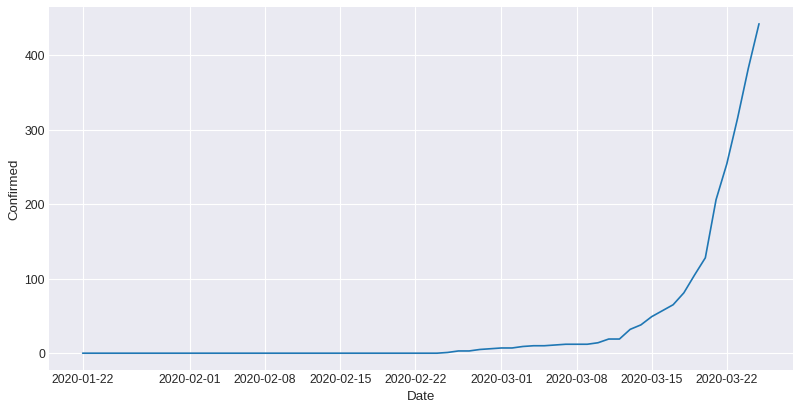

In [24]:
grid = sns.lineplot(data=all_data_df[(all_data_df["Country/Region"] == 'Croatia')], x="Date", y="Confirmed")

In [25]:
#all_data_df[(all_data_df["Country/Region"] == 'Croatia')].groupby('DayOfYear').max().reset_index()['Recovered'].values

In [26]:
#grid = sns.lineplot(data=all_data_df[(all_data_df["Country/Region"] == 'Croatia')].groupby('DayOfYear').max().reset_index(), x="DayOfYear", y="Recovered")

In [27]:
# Slovenia and Hungary are bordering Croatia in north, Bosnia and Herzegovina, and Serbia in east, it has a short border with Montenegro, and it shares maritime borders with Italy.
croatia_bordering_countried = ['Croatia', 'Slovenia', 'Hungary', 'Serbia', 'Montenegro', 'Italy', 'Bosnia and Herzegovina']
croatia_bordering_countried_no_it = ['Croatia', 'Slovenia', 'Hungary', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina']

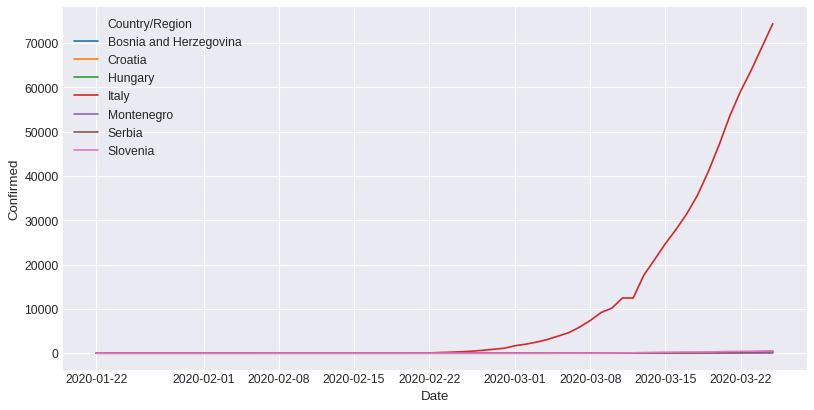

In [28]:
grid = sns.lineplot(data=all_data_df[(all_data_df["Country/Region"].isin(croatia_bordering_countried))], x="Date", y="Confirmed", hue="Country/Region")

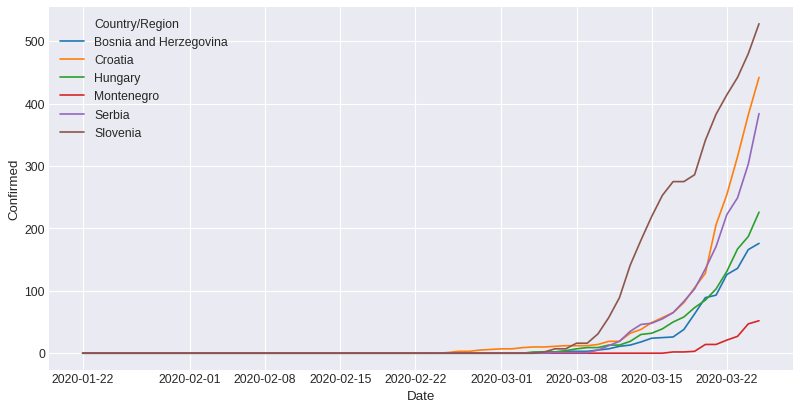

In [29]:
grid = sns.lineplot(data=all_data_df[(all_data_df["Country/Region"].isin(croatia_bordering_countried_no_it))], x="Date", y="Confirmed", hue="Country/Region")

In [30]:
#grid = sns.lineplot(data=all_data_df[(all_data_df["Country/Region"].isin(croatia_bordering_countried_no_it))], x="Date", y="Recovered", hue="Country/Region")

In [31]:
import datetime

all_data_df['DateWeek'] = all_data_df['Date'].apply(lambda date_row: date_row.isocalendar()[1])
all_data_df['DayOfYear'] = all_data_df['Date'].apply(lambda date_row: date_row.timetuple().tm_yday)

In [32]:
(all_data_df[(all_data_df["Country/Region"] == 'Croatia')].groupby(['DateWeek']).max()).reset_index()

DateWeek  Province/State Country/Region   Lat  Long        Date  Confirmed  \
0         4             NaN        Croatia  45.1  15.2  2020-01-26          0   
1         5             NaN        Croatia  45.1  15.2  2020-02-02          0   
2         6             NaN        Croatia  45.1  15.2  2020-02-09          0   
3         7             NaN        Croatia  45.1  15.2  2020-02-16          0   
4         8             NaN        Croatia  45.1  15.2  2020-02-23          0   
5         9             NaN        Croatia  45.1  15.2  2020-03-01          7   
6        10             NaN        Croatia  45.1  15.2  2020-03-08         12   
7        11             NaN        Croatia  45.1  15.2  2020-03-15         49   
8        12             NaN        Croatia  45.1  15.2  2020-03-22        254   
9        13             NaN        Croatia  45.1  15.2  2020-03-25        442   

   Deaths  Recovered  DayOfYear  
0       0        0.0         26  
1       0        0.0         33  
2       0      112.0         40  
3       0        0.0         47  
4       0        0.0         54  
5       0      821.0         61  
6       0      135.0         68  
7       0       31.0         75  
8       1      172.0         82  
9       1        0.0         85

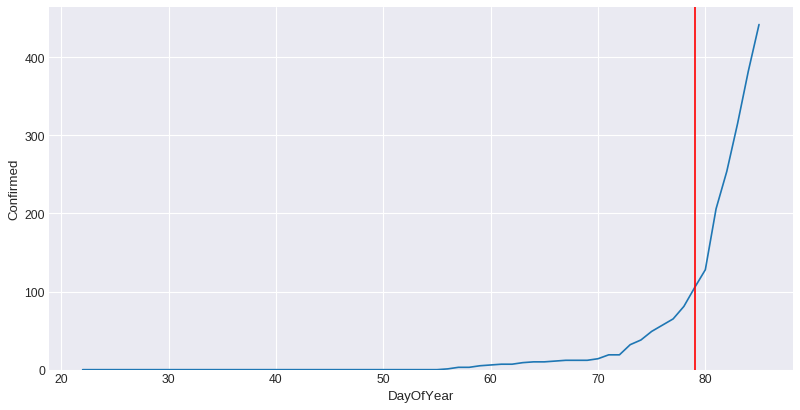

In [33]:
g = sns.lineplot(data=(all_data_df[(all_data_df["Country/Region"] == 'Croatia')].groupby(['DayOfYear']).max()).reset_index(), x="DayOfYear", y="Confirmed")
g.set(ylim=(0, None))

# Day of quarantine
plt.axvline(datetime.datetime(2020, 3, 19).timetuple().tm_yday, 0, 1, color='red')

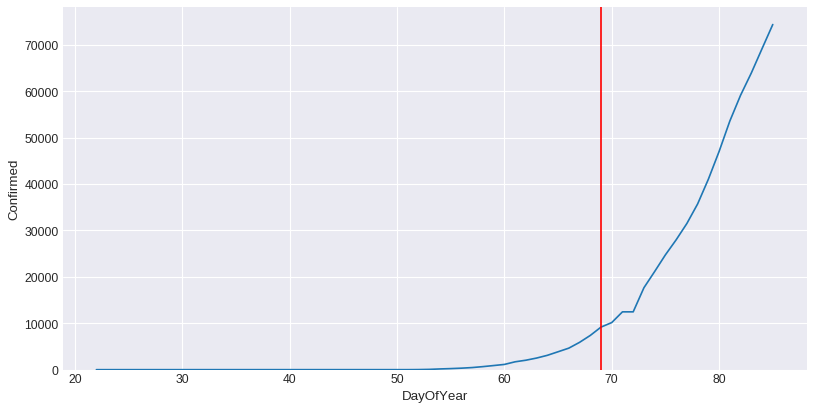

In [34]:
g = sns.lineplot(data=(all_data_df[(all_data_df["Country/Region"] == 'Italy')].groupby(['DayOfYear']).max()).reset_index(), x="DayOfYear", y="Confirmed")
g.set(ylim=(0, None))

# Day of quarantine
#plt.axvline(datetime.datetime(2020, 2, 21).timetuple().tm_yday, 0, 1, color='red')
plt.axvline(datetime.datetime(2020, 3, 9).timetuple().tm_yday, 0, 1, color='red')

[(30, 63.5)]

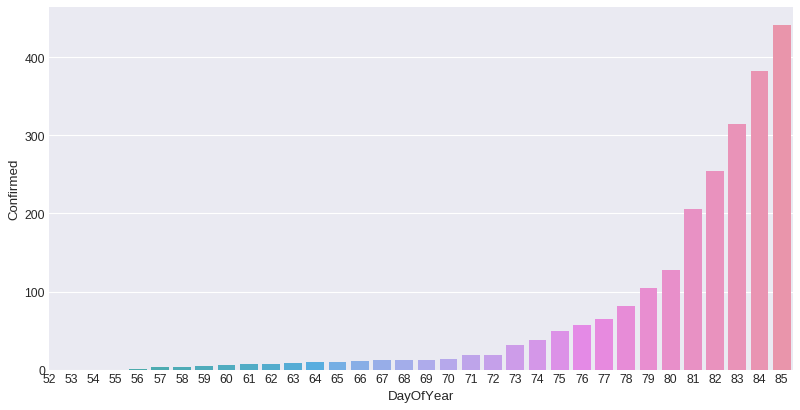

In [35]:
g = sns.barplot(data=(all_data_df[(all_data_df["Country/Region"] == 'Croatia')].groupby(['DayOfYear']).max()).reset_index(), x="DayOfYear", y="Confirmed")
g.set(ylim=(0, None))
g.set(xlim=(30, None))

[(30, 63.5)]

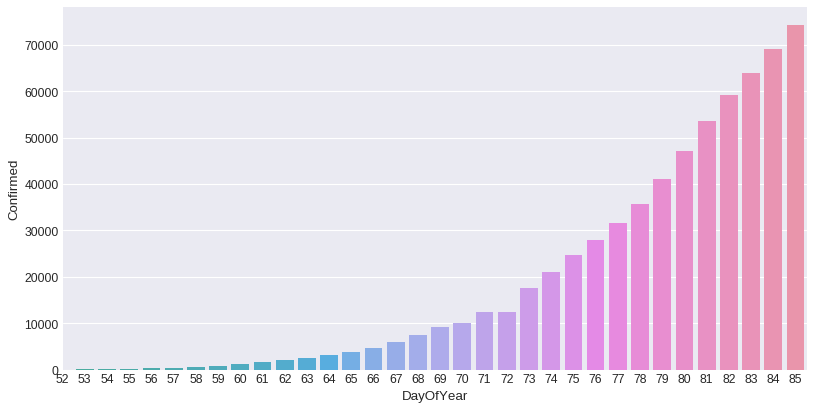

In [36]:
g = sns.barplot(data=(all_data_df[(all_data_df["Country/Region"] == 'Italy')].groupby(['DayOfYear']).max()).reset_index(), x="DayOfYear", y="Confirmed")
g.set(ylim=(0, None))
g.set(xlim=(30, None))

In [37]:
cro_data_df = all_data_df[(all_data_df["Country/Region"].isin(croatia_bordering_countried))].sort_values('Confirmed')
#cro_data_df = all_data_df[(all_data_df["Confirmed"] < 100) & (data["Country/Region"].isin(croatia_bordering_countried))].sort_values('Confirmed')

In [38]:
cro_data_df

Province/State          Country/Region      Lat     Long        Date  \
27               NaN  Bosnia and Herzegovina  43.9159  17.6791  2020-01-22   
6499             NaN                 Hungary  47.1625  19.5033  2020-02-17   
6532             NaN              Montenegro  42.5000  19.3000  2020-02-17   
6564             NaN                  Serbia  44.0165  21.0059  2020-02-17   
6568             NaN                Slovenia  46.1512  14.9955  2020-02-17   
...              ...                     ...      ...      ...         ...   
14592            NaN                   Italy  43.0000  12.0000  2020-03-21   
14837            NaN                   Italy  43.0000  12.0000  2020-03-22   
15082            NaN                   Italy  43.0000  12.0000  2020-03-23   
15327            NaN                   Italy  43.0000  12.0000  2020-03-24   
15572            NaN                   Italy  43.0000  12.0000  2020-03-25   

       Confirmed  Deaths  Recovered  DateWeek  DayOfYear  
27             0       0        0.0         4         22  
6499           0       0       15.0         8         48  
6532           0       0        0.0         8         48  
6564           0       0        0.0         8         48  
6568           0       0      112.0         8         48  
...          ...     ...        ...       ...        ...  
14592      53578    4825        1.0        12         81  
14837      59138    5476        0.0        12         82  
15082      63927    6077        0.0        13         83  
15327      69176    6820        0.0        13         84  
15572      74386    7503        0.0        13         85  

[448 rows x 10 columns]

In [39]:
# The assumption is that the latest day is the one containing the biggest numbers which is a valid assumption
cro_data_df.groupby("Country/Region").max().reset_index().sort_values('Confirmed')

Country/Region  Province/State      Lat     Long        Date  \
4              Montenegro             NaN  42.5000  19.3000  2020-03-25   
0  Bosnia and Herzegovina             NaN  43.9159  17.6791  2020-03-25   
2                 Hungary             NaN  47.1625  19.5033  2020-03-25   
5                  Serbia             NaN  44.0165  21.0059  2020-03-25   
1                 Croatia             NaN  45.1000  15.2000  2020-03-25   
6                Slovenia             NaN  46.1512  14.9955  2020-03-25   
3                   Italy             NaN  43.0000  12.0000  2020-03-25   

   Confirmed  Deaths  Recovered  DateWeek  DayOfYear  
4         52       1      447.0        13         85  
0        176       3      956.0        13         85  
2        226      10    56003.0        13         85  
5        384       4     4025.0        13         85  
1        442       1      821.0        13         85  
6        528       5      436.0        13         85  
3      74386    7503      768.0        13         85

In [40]:
cro_data_df[(cro_data_df["Confirmed"] > 30)].sort_values('Confirmed')

Province/State          Country/Region      Lat     Long        Date  \
11958            NaN                Slovenia  46.1512  14.9955  2020-03-10   
13114            NaN                 Hungary  47.1625  19.5033  2020-03-15   
12582            NaN                 Croatia  45.1000  15.2000  2020-03-13   
12689            NaN                  Serbia  44.0165  21.0059  2020-03-13   
13747            NaN  Bosnia and Herzegovina  43.9159  17.6791  2020-03-18   
...              ...                     ...      ...      ...         ...   
14592            NaN                   Italy  43.0000  12.0000  2020-03-21   
14837            NaN                   Italy  43.0000  12.0000  2020-03-22   
15082            NaN                   Italy  43.0000  12.0000  2020-03-23   
15327            NaN                   Italy  43.0000  12.0000  2020-03-24   
15572            NaN                   Italy  43.0000  12.0000  2020-03-25   

       Confirmed  Deaths  Recovered  DateWeek  DayOfYear  
11958         31       0        0.0        11         70  
13114         32       1      326.0        11         75  
12582         32       0        1.0        11         73  
12689         35       0        0.0        11         73  
13747         38       0        1.0        12         78  
...          ...     ...        ...       ...        ...  
14592      53578    4825        1.0        12         81  
14837      59138    5476        0.0        12         82  
15082      63927    6077        0.0        13         83  
15327      69176    6820        0.0        13         84  
15572      74386    7503        0.0        13         85  

[96 rows x 10 columns]

In [41]:
# Preparing data for geoplot:
timeline_data_df = all_data_df.copy()
timeline_data_df.loc[:, 'Scaled Confirmed'] = timeline_data_df.loc[:, 'Confirmed'].apply(lambda s: np.log(s))
timeline_data_df.loc[:, 'Scaled Confirmed'] = timeline_data_df.loc[:, 'Scaled Confirmed'].apply(lambda s: 0 if s == -np.inf else s)

In [42]:
timeline_data_df["DateStr"] = timeline_data_df["Date"].astype(str)

## Regression, China

In [43]:
all_data_df[(all_data_df["Country/Region"] == 'China')].groupby('Province/State').max().sort_values('Confirmed')

Country/Region      Lat      Long        Date  Confirmed  \
Province/State                                                            
Tibet                   China  31.6927   88.0924  2020-03-25          1   
Qinghai                 China  35.7452   95.9956  2020-03-25         18   
Macau                   China  22.1667  113.5500  2020-03-25         30   
Ningxia                 China  37.2692  106.1655  2020-03-25         75   
Xinjiang                China  41.1129   85.2401  2020-03-25         76   
Inner Mongolia          China  44.0935  113.9448  2020-03-25         77   
Jilin                   China  43.6661  126.1923  2020-03-25         94   
Liaoning                China  41.2956  122.6085  2020-03-25        127   
Shanxi                  China  37.5777  112.2922  2020-03-25        134   
Gansu                   China  37.8099  101.0583  2020-03-25        136   
Tianjin                 China  39.3054  117.3230  2020-03-25        145   
Guizhou                 China  26.8154  106.8748  2020-03-25        147   
Hainan                  China  19.1959  109.7453  2020-03-25        168   
Yunnan                  China  24.9740  101.4870  2020-03-25        176   
Shaanxi                 China  35.1917  108.8701  2020-03-25        250   
Guangxi                 China  23.8298  108.7881  2020-03-25        254   
Hebei                   China  39.5490  116.1306  2020-03-25        319   
Fujian                  China  26.0789  117.9874  2020-03-25        322   
Hong Kong               China  22.3000  114.2000  2020-03-25        410   
Shanghai                China  31.2020  121.4491  2020-03-25        433   
Heilongjiang            China  47.8620  127.7615  2020-03-25        484   
Sichuan                 China  30.6171  102.7103  2020-03-25        547   
Beijing                 China  40.1824  116.4142  2020-03-25        561   
Chongqing               China  30.0572  107.8740  2020-03-25        578   
Jiangsu                 China  32.9711  119.4550  2020-03-25        638   
Shandong                China  36.3427  118.1498  2020-03-25        769   
Jiangxi                 China  27.6140  115.7221  2020-03-25        936   
Anhui                   China  31.8257  117.2264  2020-03-25        990   
Hunan                   China  27.6104  111.7088  2020-03-25       1018   
Zhejiang                China  29.1832  120.0934  2020-03-25       1241   
Henan                   China  33.8820  113.6140  2020-03-25       1274   
Guangdong               China  23.3417  113.4244  2020-03-25       1433   
Hubei                   China  30.9756  112.2707  2020-03-25      67801   

                Deaths  Recovered  DateWeek  DayOfYear  
Province/State                                          
Tibet                0      463.0        13         85  
Qinghai              0     2222.0        13         85  
Macau                0    59433.0        13         85  
Ningxia              0     1014.0        13         85  
Xinjiang             3     1250.0        13         85  
Inner Mongolia       1    33934.0        13         85  
Jilin                1     1250.0        13         85  
Liaoning             2     1016.0        13         85  
Shanxi               0      868.0        13         85  
Gansu                2     2394.0        13         85  
Tianjin              3     1669.0        13         85  
Guizhou              2     1059.0        13         85  
Hainan               6    59879.0        13         85  
Yunnan               2      984.0        13         85  
Shaanxi              3      631.0        13         85  
Guangxi              2     1250.0        13         85  
Hebei                6     1014.0        13         85  
Fujian               1    36208.0        13         85  
Hong Kong            4     1329.0        13         85  
Shanghai             5     1198.0        13         85  
Heilongjiang        13     2639.0        13         85  
Sichuan              3    31536.0        13         85  
Beijing              

In [44]:
sns.set_context("notebook")

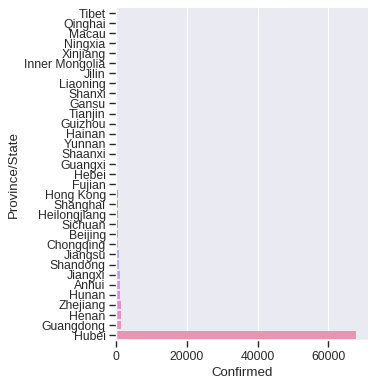

In [45]:
g = sns.catplot(data=all_data_df[(all_data_df["Country/Region"] == 'China')].groupby('Province/State').max().sort_values('Confirmed').reset_index(), kind="bar", x="Confirmed", y="Province/State", orient='h')

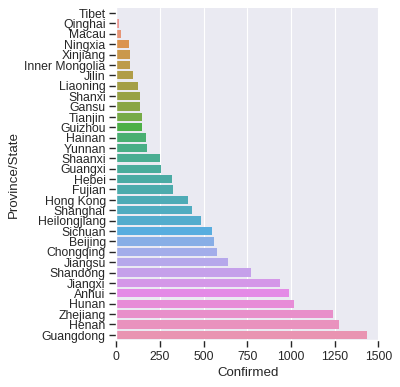

In [46]:
g = sns.catplot(data=all_data_df[(all_data_df["Country/Region"] == 'China') & (all_data_df["Province/State"] != 'Hubei')].groupby('Province/State').max().sort_values('Confirmed').reset_index(), kind="bar", x="Confirmed", y="Province/State", orient='h')

In [47]:
all_data_df['Date'].min()
all_data_df['Date'].max()

datetime.date(2020, 3, 25)

In [48]:
all_data_df[(all_data_df["Country/Region"] == 'China') & (all_data_df['Province/State'] == 'Hubei')].sort_values('Confirmed')

Province/State Country/Region      Lat      Long        Date  Confirmed  \
62             Hubei          China  30.9756  112.2707  2020-01-22        444   
307            Hubei          China  30.9756  112.2707  2020-01-23        444   
552            Hubei          China  30.9756  112.2707  2020-01-24        549   
797            Hubei          China  30.9756  112.2707  2020-01-25        761   
1042           Hubei          China  30.9756  112.2707  2020-01-26       1058   
...              ...            ...      ...       ...         ...        ...   
14517          Hubei          China  30.9756  112.2707  2020-03-21      67800   
14762          Hubei          China  30.9756  112.2707  2020-03-22      67800   
15007          Hubei          China  30.9756  112.2707  2020-03-23      67800   
15252          Hubei          China  30.9756  112.2707  2020-03-24      67801   
15497          Hubei          China  30.9756  112.2707  2020-03-25      67801   

       Deaths  Recovered  DateWeek  DayOfYear  
62         17        0.0         4         22  
307        17        0.0         4         23  
552        24        0.0         4         24  
797        40        0.0         4         25  
1042       52        0.0         4         26  
...       ...        ...       ...        ...  
14517    3139       73.0        12         81  
14762    3153        0.0        12         82  
15007    3153        0.0        13         83  
15252    3160        0.0        13         84  
15497    3163        0.0        13         85  

[64 rows x 10 columns]

In [49]:
# Preparing data for geoplot:
timeline_data = all_data_df.copy()
timeline_data.loc[:, 'Scaled Confirmed'] = timeline_data.loc[:, 'Confirmed'].apply(lambda s: np.log(s))
timeline_data.loc[:, 'Scaled Confirmed'] = timeline_data.loc[:, 'Scaled Confirmed'].apply(lambda s: 0 if s == -np.inf else s)

In [50]:
timeline_data[timeline_data["Scaled Confirmed"].isna()]
timeline_data["Scaled Confirmed"] = timeline_data["Scaled Confirmed"].fillna(0) 
#timeline_data.dropna(subset=["Scaled Confirmed"])

In [51]:
timeline_data["Date"] = timeline_data["Date"].astype(str)

In [52]:
timeline_data

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.000000  65.000000  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
15675            NaN                  Libya  26.335100  17.228331  2020-03-25   
15676            NaN     West Bank and Gaza  31.952200  35.233200  2020-03-25   
15677            NaN          Guinea-Bissau  11.803700 -15.180400  2020-03-25   
15678            NaN                   Mali  17.570692  -3.996166  2020-03-25   
15679            NaN  Saint Kitts and Nevis  17.357822 -62.782998  2020-03-25   

       Confirmed  Deaths  Recovered  DateWeek  DayOfYear  Scaled Confirmed  
0              0       0        0.0         4         22          0.000000  
1              0       0        0.0         4         22          0.000000  
2              0       0        0.0         4         22          0.000000  
3              0       0        0.0         4         22          0.000000  
4              0       0        0.0         4         22          0.000000  
...          ...     ...        ...       ...        ...               ...  
15675          1       0        0.0        13         85          0.000000  
15676         -1      -1        0.0        13         85          0.000000  
15677          2       0        0.0        13         85          0.693147  
15678          2       0        0.0        13         85          0.693147  
15679          2       0        0.0        13         85          0.693147  

[15680 rows x 11 columns]

In [53]:
fig = go.Figure(data=go.Scattergeo(
        lon = timeline_data['Long'],
        lat = timeline_data['Lat'],
        text = timeline_data['Country/Region'] + ', ' + timeline_data['Province/State'],

        mode = 'markers',
        marker = dict(
            size = timeline_data["Scaled Confirmed"],
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'inferno',
            cmin = 0,
            color = timeline_data["Scaled Confirmed"],
            #cmax = timeline_data['Scaled Confirmed'].max(),
            colorbar_title="Asia status"
        )

        ))

fig.update_layout(
    title = 'Asia status',
    geo_scope='asia',

)
fig.show()

In [54]:
fig = px.scatter_geo(timeline_data[(timeline_data["Country/Region"] == 'China')], lat="Lat", lon="Long",
                     color="Confirmed", # which column to use to set the color of markers
                     hover_data=['Province/State'], # column added to hover information
                     size="Scaled Confirmed", # size of markers
                     projection="natural earth")

fig.update_layout(
        title = 'Spread of the virus for Asia, focus on China',
        geo_scope='asia',
    )
fig.show()

In [55]:
# Plotting geoplot:
fig = px.scatter_geo(timeline_data[(timeline_data["Country/Region"] == 'China')], lat="Lat", lon="Long", size="Scaled Confirmed", opacity=0.7,hover_name = "Country/Region",animation_frame="Date", color="Confirmed",hover_data=['Confirmed'], projection="natural earth")

fig.update_layout(
        title = 'Spread of the virus for Asia, focus on China',
        geo_scope='asia',
    )
fig.show()

## Focus on specific province

### Hubei

Text(0.5, 1.0, 'Hubei confirmed cases')

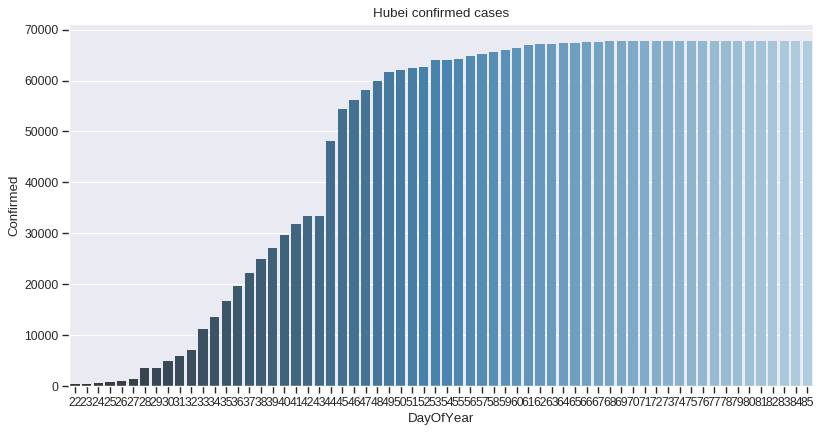

In [56]:
china_hubei_df = all_data_df[(all_data_df["Country/Region"] == 'China') & (all_data_df['Province/State'] == 'Hubei')]

ax = sns.barplot(data=china_hubei_df, x="DayOfYear", y="Confirmed", ci="sd", palette="Blues_d")
ax.set_title('Hubei confirmed cases')

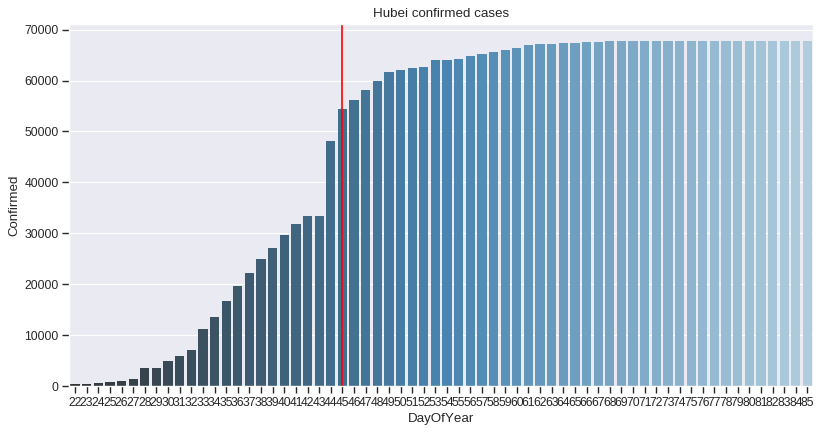

In [57]:
china_hubei_df = all_data_df[(all_data_df["Country/Region"] == 'China') & (all_data_df['Province/State'] == 'Hubei')]

ax = sns.barplot(data=china_hubei_df, x="DayOfYear", y="Confirmed", ci="sd", palette="Blues_d")
ax.set_title('Hubei confirmed cases')

plt.axvline(datetime.datetime(2020, 1, 23).timetuple().tm_yday, 0, 1, color='red')

## Guangdong

Text(0.5, 1.0, 'Guangdong confirmed cases')

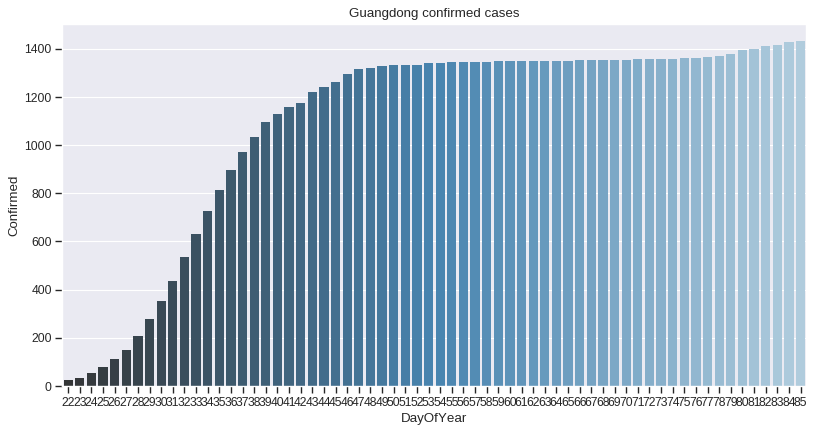

In [58]:
china_guangdong_df = all_data_df[(all_data_df["Country/Region"] == 'China') & (all_data_df['Province/State'] == 'Guangdong')]

ax = sns.barplot(data=china_guangdong_df, x="DayOfYear", y="Confirmed", ci="sd", palette="Blues_d")
ax.set_title('Guangdong confirmed cases')

## Henan

Text(0.5, 1.0, 'Henan confirmed cases')

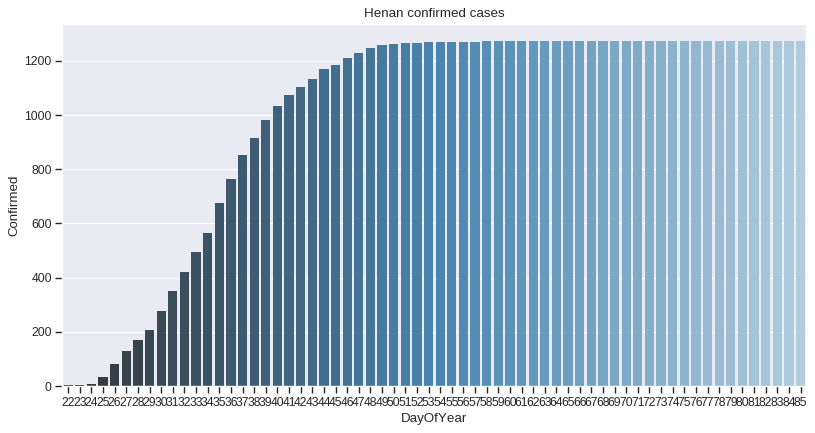

In [59]:
china_henan_df = all_data_df[(all_data_df["Country/Region"] == 'China') & (all_data_df['Province/State'] == 'Henan')]

ax = sns.barplot(data=china_henan_df, x="DayOfYear", y="Confirmed", ci="sd", palette="Blues_d")
ax.set_title('Henan confirmed cases')

## Zhejiang

Text(0.5, 1.0, 'Henan confirmed cases')

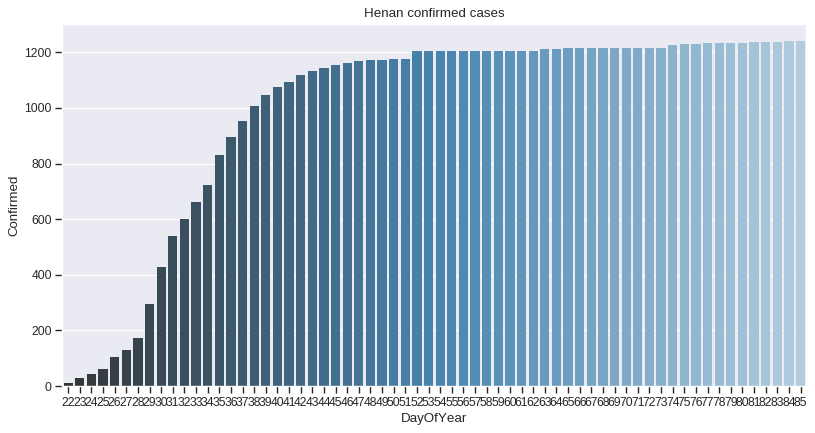

In [60]:
china_zhejiang_df = all_data_df[(all_data_df["Country/Region"] == 'China') & (all_data_df['Province/State'] == 'Zhejiang')]

ax = sns.barplot(data=china_zhejiang_df, x="DayOfYear", y="Confirmed", ci="sd", palette="Blues_d")
ax.set_title('Henan confirmed cases')

## Logistic curve

In [61]:
import numpy, scipy
from scipy.optimize import curve_fit
import warnings

np.set_printoptions(suppress=True)

In [62]:
def show_logistic_regression(x_data, y_data, title='Data projection', initial_params=np.array([1.0, 1.0, 1.0])):

    def logistic_equation(x, a, b, c):
        return a / (1.0 + np.power(x / b, c))

    fitted_parameters, pcov = curve_fit(logistic_equation, x_data, y_data, initial_params)

    model_predictions = logistic_equation(x_data, *fitted_parameters) 

    absolute_error = model_predictions - y_data

    squared_error = np.square(absolute_error)
    mean_squared_error = np.mean(squared_error)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    r_squared = 1.0 - (np.var(absolute_error) / np.var(y_data))

    print('Parameters:', fitted_parameters)
    print('RMSE:', root_mean_squared_error)
    print('R-squared:', r_squared)

    print()


    def scatter_plot():
        f = plt.figure(figsize=(16,10), dpi=100)
        axes = f.add_subplot(111)

        # Plot the actual data
        axes.plot(x_data, y_data, 'X')

        # Create model data
        x_model = numpy.linspace(min(x_data), max(x_data) + 40)
        y_model = logistic_equation(x_model, *fitted_parameters)

        # Plot model data
        axes.plot(x_model, y_model)

        axes.set_xlabel('Days in year')
        axes.set_ylabel('Confirmed cases')

        axes.set_title(title)

        axes.axvline(datetime.date.today().timetuple().tm_yday, 0, 1, color='red', linewidth=4)
        axes.axhline(fitted_parameters[0], 0, 1, color='blue', linewidth=4)


    scatter_plot()

## China

Parameters: [68360.93700554    40.50751641    -9.30451819]
RMSE: 2115.451230332742
R-squared: 0.9933239286807224



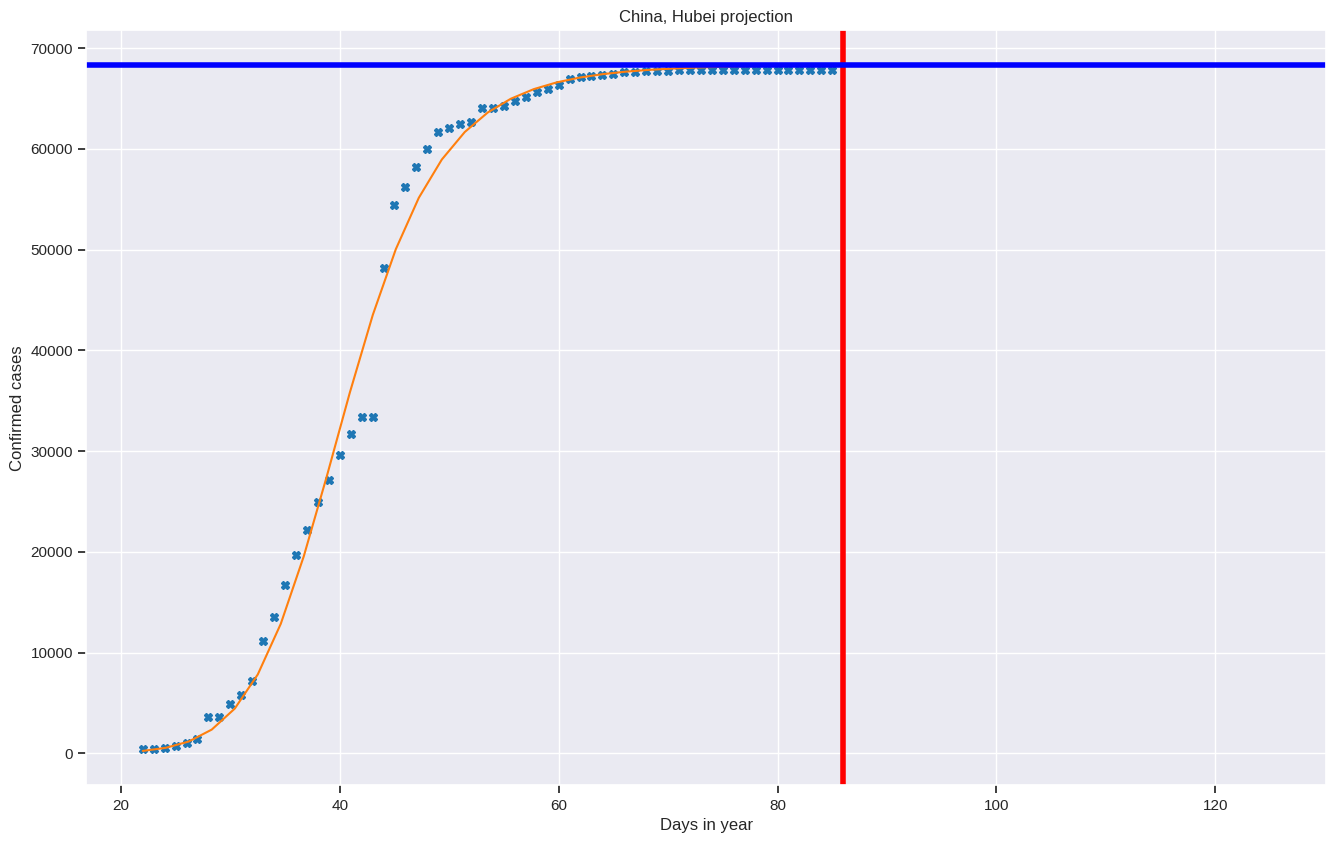

In [63]:
fit_data_df = china_hubei_df

x_data = fit_data_df['DayOfYear'].values
y_data = fit_data_df['Confirmed'].values

show_logistic_regression(x_data, y_data, title='China, Hubei projection')

If you need to check this for some reason.

Parameters: [1367.79829893   33.65515032   -9.06259464]
RMSE: 17.889286291024074
R-squared: 0.9983440105007919



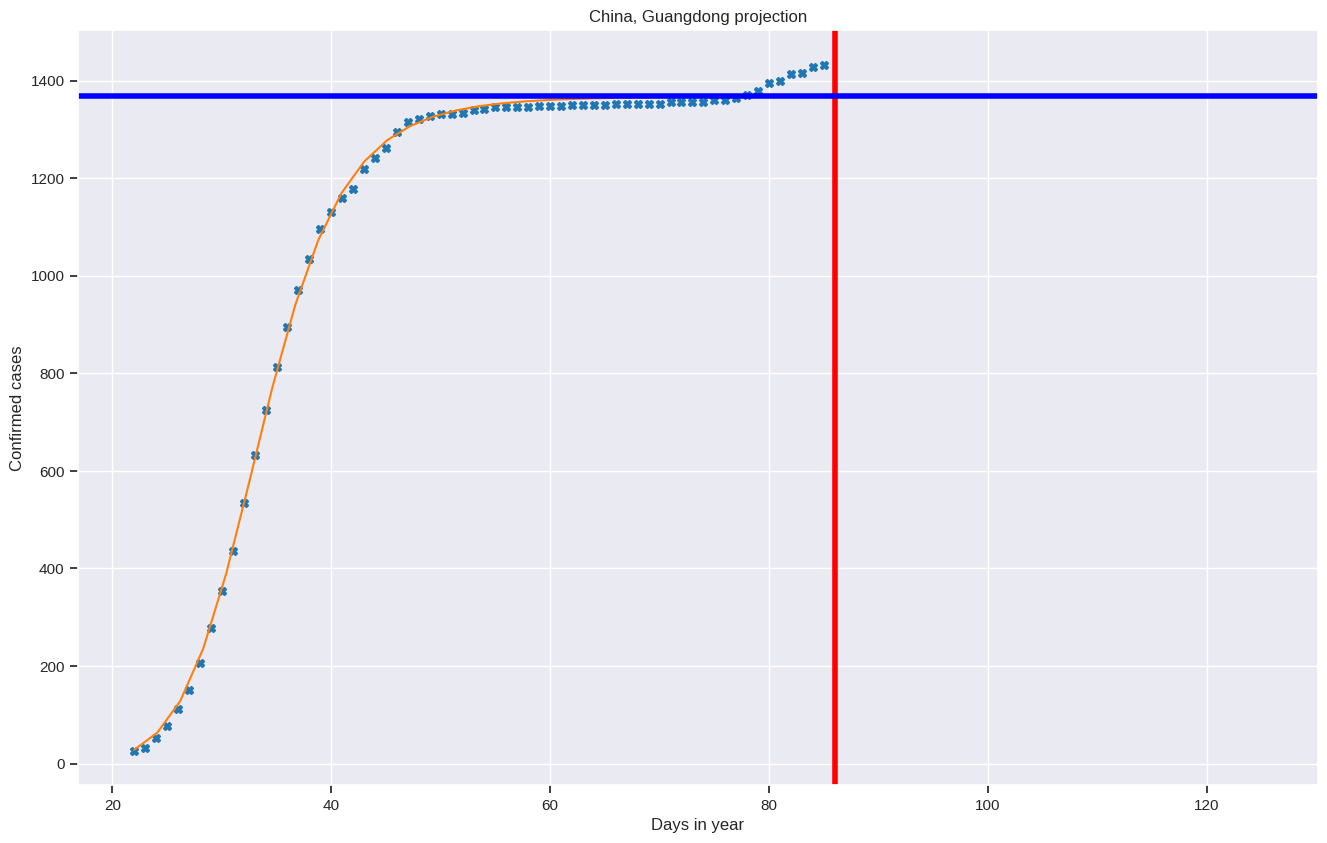

In [64]:
fit_data_df = china_guangdong_df

x_data = fit_data_df['DayOfYear'].values
y_data = fit_data_df['Confirmed'].values

show_logistic_regression(x_data, y_data, title='China, Guangdong projection')

Parameters: [1278.60064229   34.51008748   -9.68066628]
RMSE: 10.220056209217978
R-squared: 0.9994303823215658



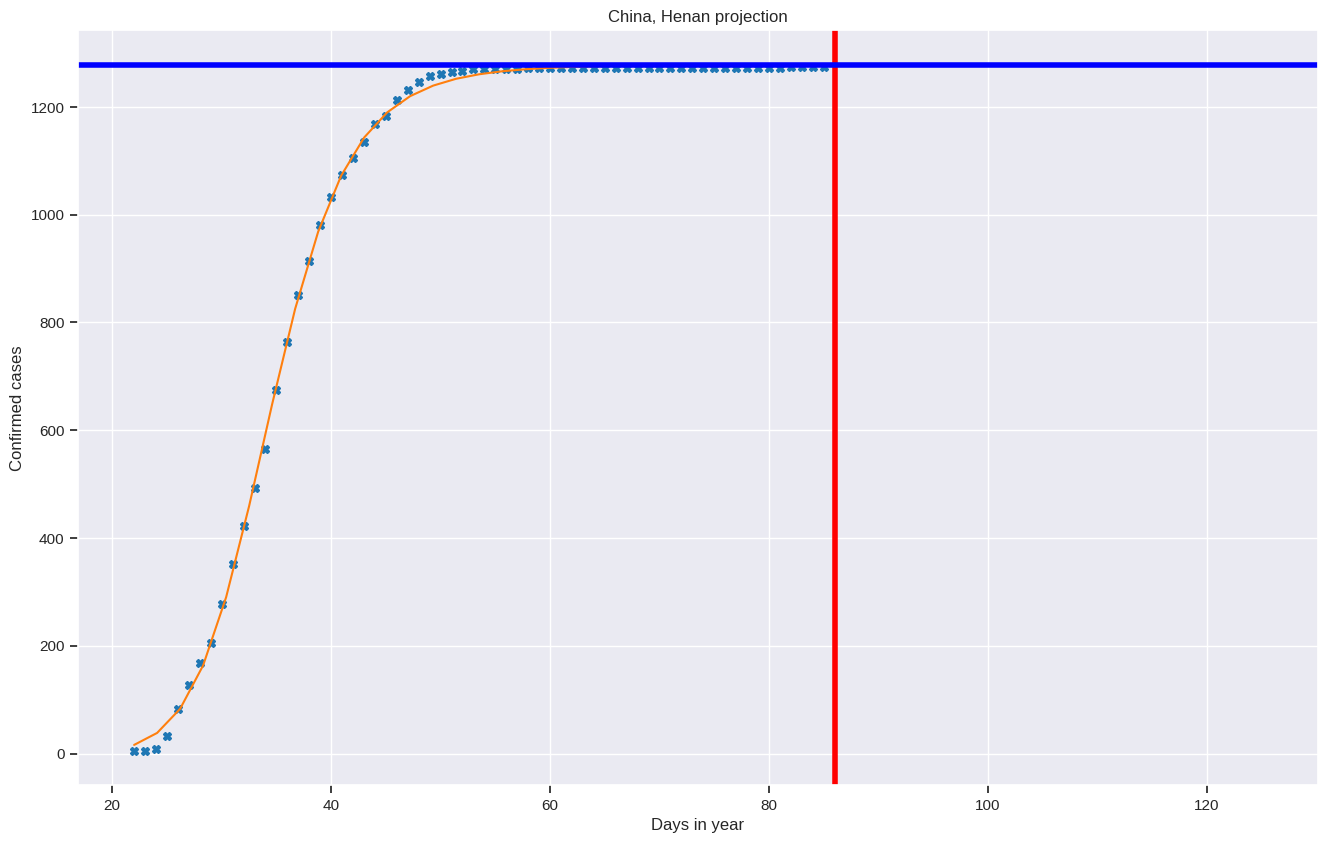

In [65]:
fit_data_df = china_henan_df

x_data = fit_data_df['DayOfYear'].values
y_data = fit_data_df['Confirmed'].values

show_logistic_regression(x_data, y_data, title='China, Henan projection')

Parameters: [1215.50724561   32.42718399   -9.85669099]
RMSE: 18.94939918255404
R-squared: 0.9975458731458261



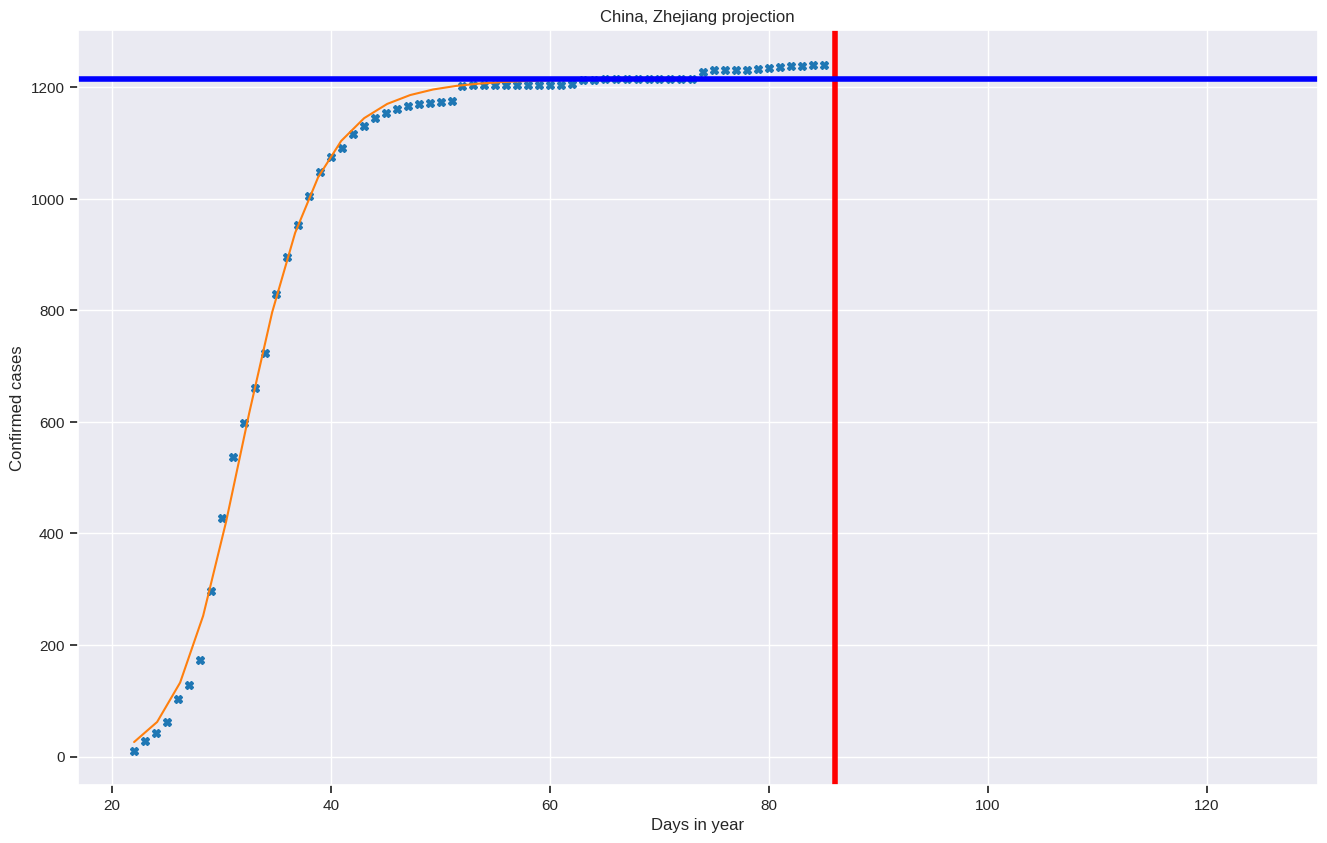

In [66]:
fit_data_df = china_zhejiang_df

x_data = fit_data_df['DayOfYear'].values
y_data = fit_data_df['Confirmed'].values

show_logistic_regression(x_data, y_data, title='China, Zhejiang projection')

## Europe

## Italy

Text(0.5, 1.0, 'Italy confirmed cases')

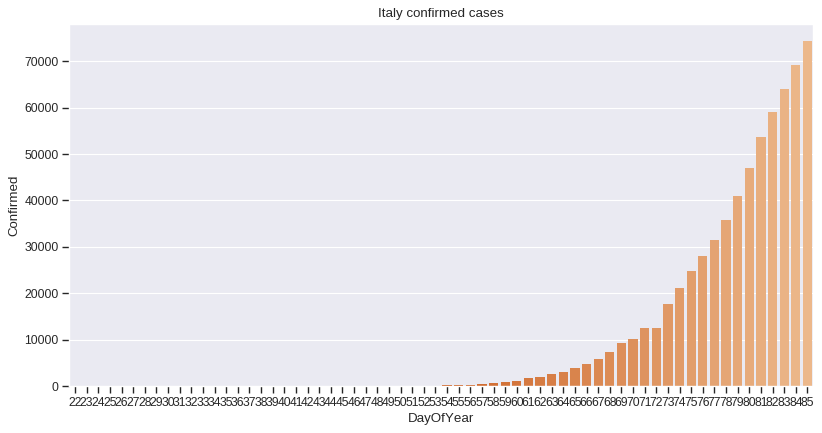

In [67]:
italy_df = all_data_df[(all_data_df["Country/Region"] == 'Italy')]

ax = sns.barplot(data=italy_df, x="DayOfYear", y="Confirmed", ci="sd", palette="Oranges_d")
ax.set_title('Italy confirmed cases')

Parameters: [132278.49790725     83.41923495    -14.18179261]
RMSE: 426.22660150364624
R-squared: 0.9994993202445519



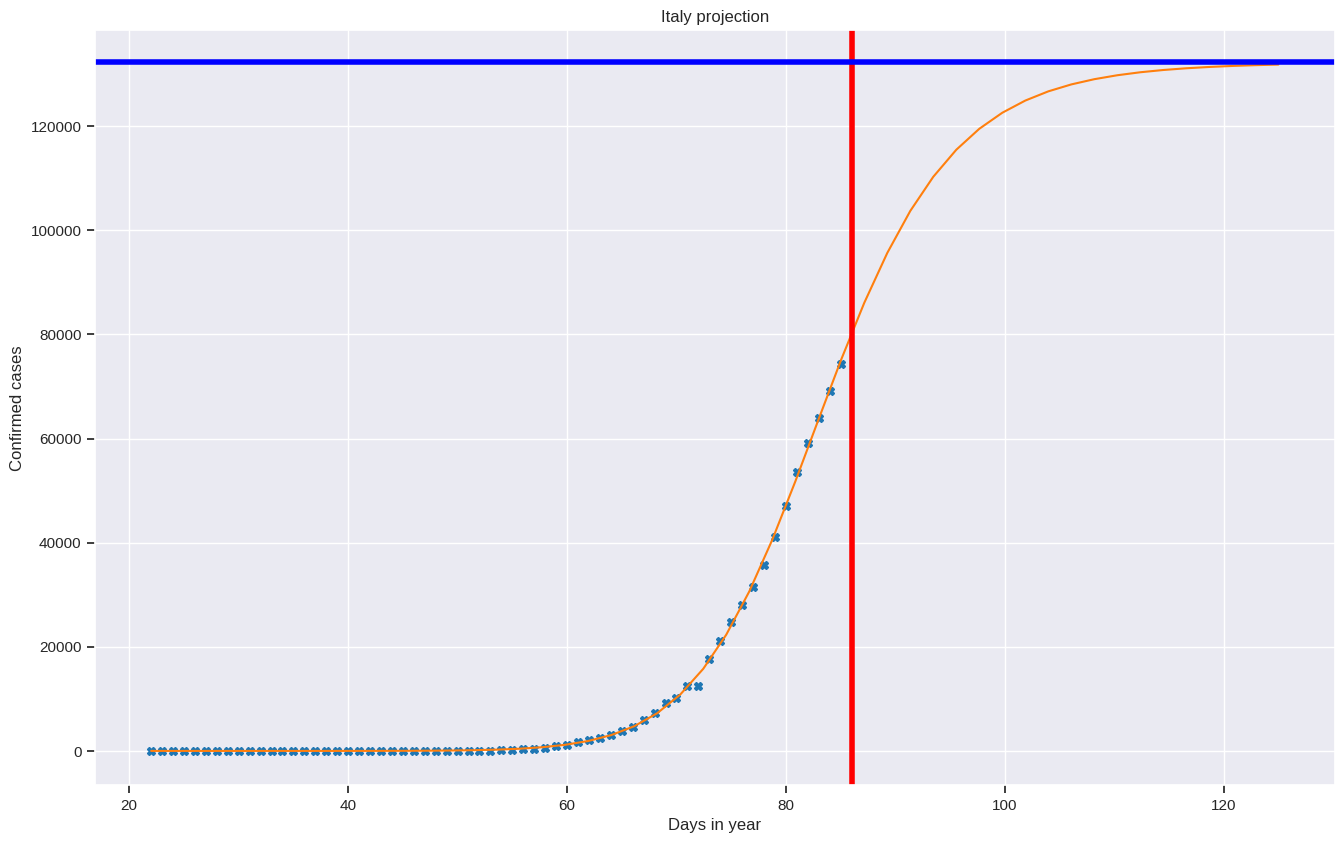

In [68]:
fit_data_df = italy_df

x_data = fit_data_df['DayOfYear'].values
y_data = fit_data_df['Confirmed'].values

show_logistic_regression(x_data, y_data, title='Italy projection')

## Spain

Text(0.5, 1.0, 'Spain confirmed cases')

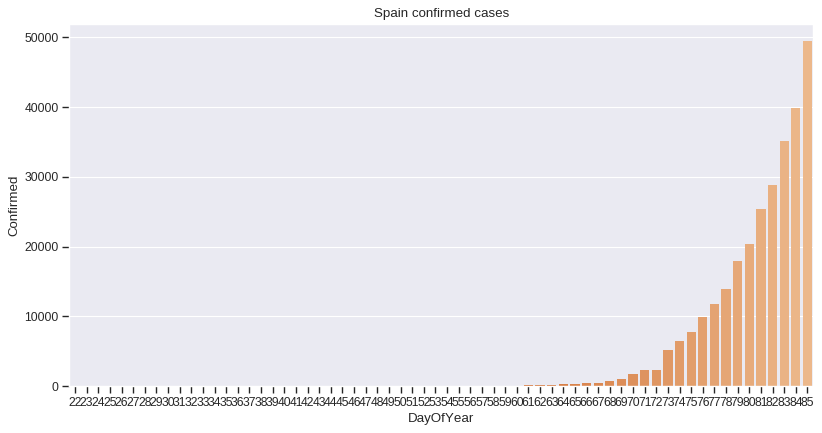

In [69]:
spain_df = all_data_df[(all_data_df["Country/Region"] == 'Spain')]

ax = sns.barplot(data=spain_df, x="DayOfYear", y="Confirmed", ci="sd", palette="Oranges_d")
ax.set_title('Spain confirmed cases')

Parameters: [177567.61991931     90.00449677    -17.23035518]
RMSE: 444.07237744582005
R-squared: 0.998187891574791



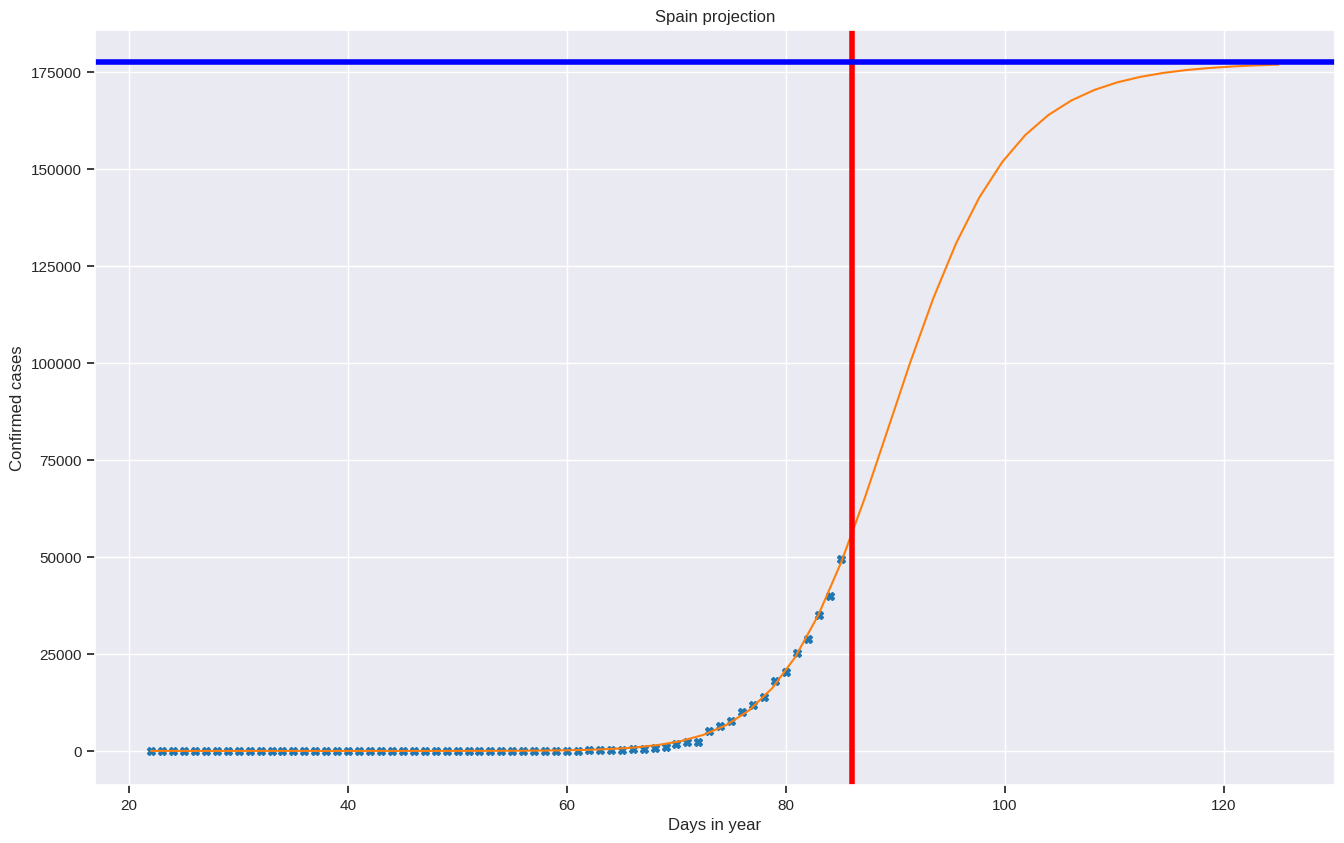

In [70]:
fit_data_df = spain_df

x_data = fit_data_df['DayOfYear'].values
y_data = fit_data_df['Confirmed'].values

show_logistic_regression(x_data, y_data, title='Spain projection')

## Germany

Text(0.5, 1.0, 'Germany confirmed cases')

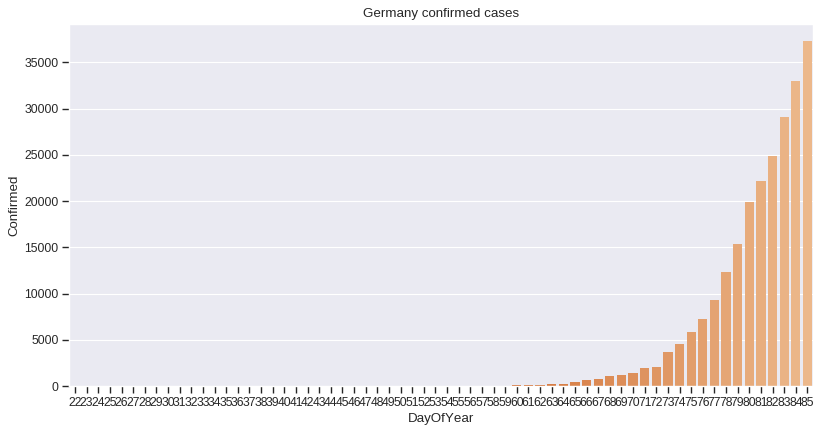

In [71]:
germany_df = all_data_df[(all_data_df["Country/Region"] == 'Germany')]

ax = sns.barplot(data=germany_df, x="DayOfYear", y="Confirmed", ci="sd", palette="Oranges_d")
ax.set_title('Germany confirmed cases')

Parameters: [57779.86363502    82.83423743   -21.79030671]
RMSE: 262.22958586570036
R-squared: 0.9990418990019447



/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in power



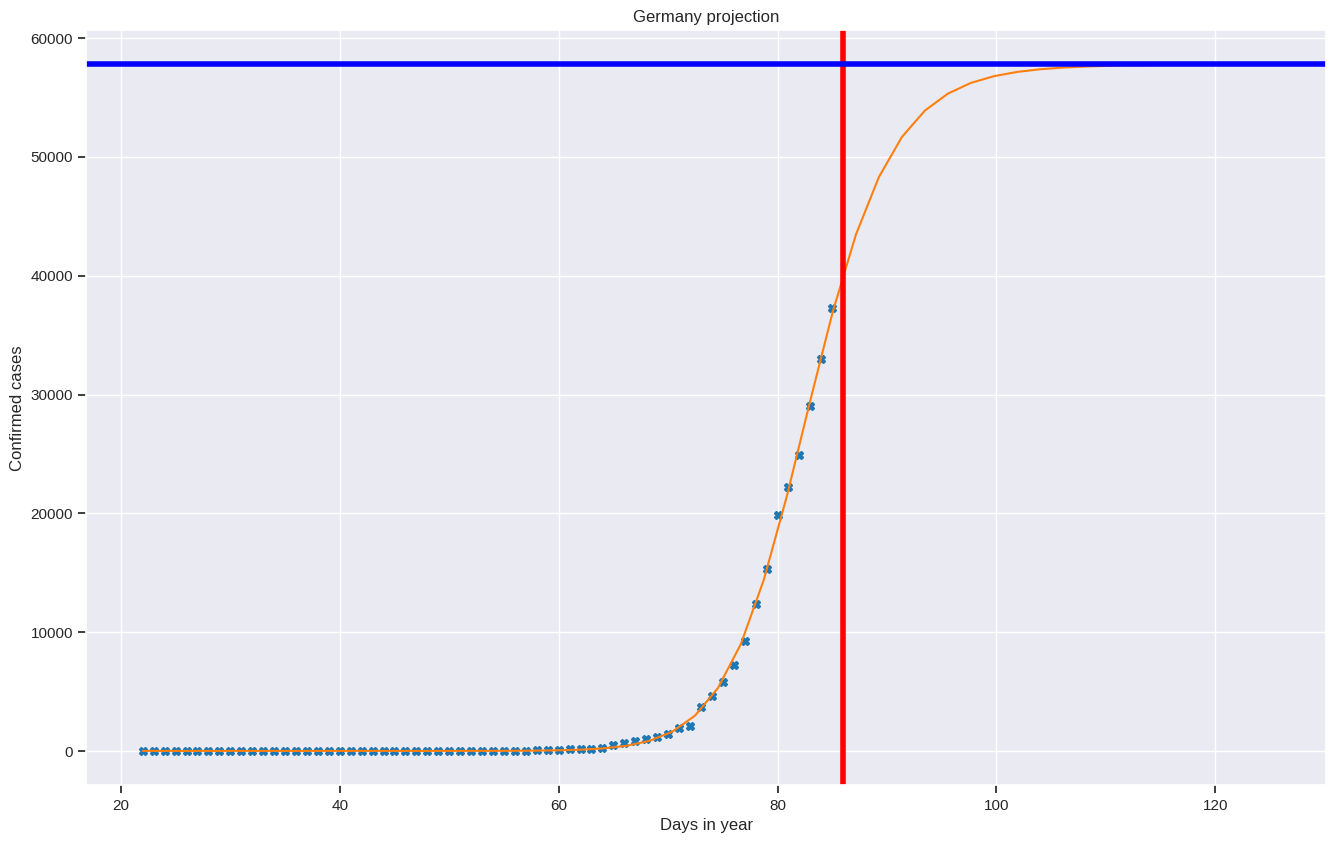

In [72]:
fit_data_df = germany_df

x_data = fit_data_df['DayOfYear'].values
y_data = fit_data_df['Confirmed'].values

show_logistic_regression(x_data, y_data, title='Germany projection', initial_params=np.array([10000, 1.0, 1.0]))

## Normal distribution

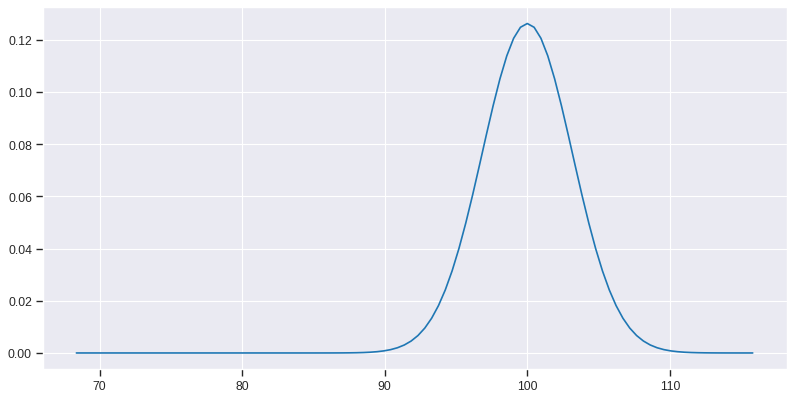

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 100
variance = 10
sigma = math.sqrt(variance)

test_x = np.linspace(mu - 10*sigma, mu + 5*sigma, 100)
test_y = stats.norm.pdf(test_x, mu, sigma)

plt.plot(test_x, test_y)
plt.show()

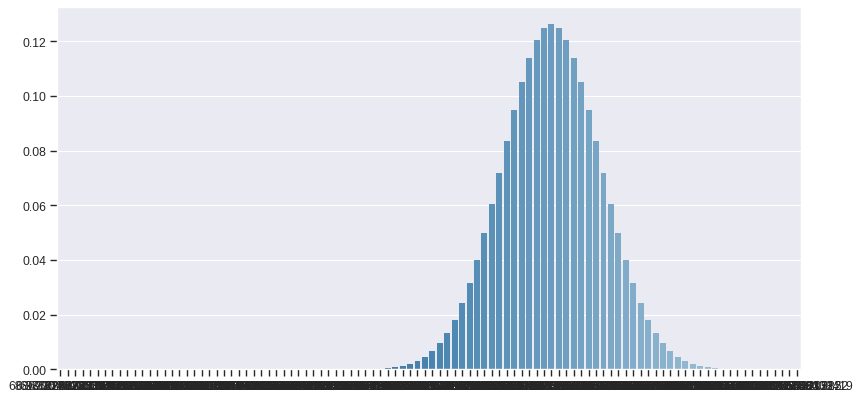

In [74]:
sns.barplot(x=test_x, y=test_y, palette="Blues_d")

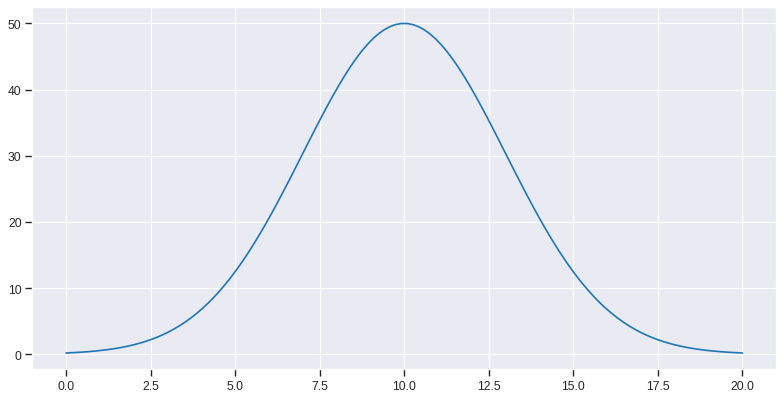

In [75]:
import numpy as np

def gaussian(x, size, mu, sig):
    return size * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_values = np.linspace(0, 20, 120)
y_values = gaussian(x_values, 50, 10, 3)
#for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
#    mp.plot(x_values, gaussian(x_values, 50, mu, sig))

plt.plot(x_values, y_values)
#plt.xlim(-5, 25)
plt.show()

In [76]:
def show_gaussian_regression(x_data, y_data, title='Data projection', params=np.array([1.0, 1.0, 1.0])):

    def gaussian_equation(x, size, mu, sig):
        return size * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

    fitted_parameters, pcov = curve_fit(gaussian_equation, x_data, y_data, params)

    model_predictions = gaussian_equation(x_data, *fitted_parameters) 

    absolute_error = model_predictions - y_data

    squared_error = np.square(absolute_error)
    mean_squared_error = np.mean(squared_error)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    r_squared = 1.0 - (np.var(absolute_error) / np.var(y_data))

    print('Parameters:', fitted_parameters)
    print('RMSE:', root_mean_squared_error)
    print('R-squared:', r_squared)

    print()


    def scatter_plot():
        f = plt.figure(figsize=(16,10), dpi=100)
        axes = f.add_subplot(111)

        # Plot the actual data
        axes.plot(x_data, y_data, 'X')

        # Create model data
        x_model = numpy.linspace(min(x_data), max(x_data) + 20)
        y_model = gaussian_equation(x_model, *fitted_parameters)

        # Plot model data
        axes.plot(x_model, y_model)

        axes.set_xlabel('Days in year')
        axes.set_ylabel('Confirmed cases')

        axes.set_title(title)

        #axes.axhline(fitted_parameters[0], 0, 1, color='blue', linewidth=4)


    scatter_plot()

Parameters: [50. 10.  3.]
RMSE: 0.0
R-squared: 1.0



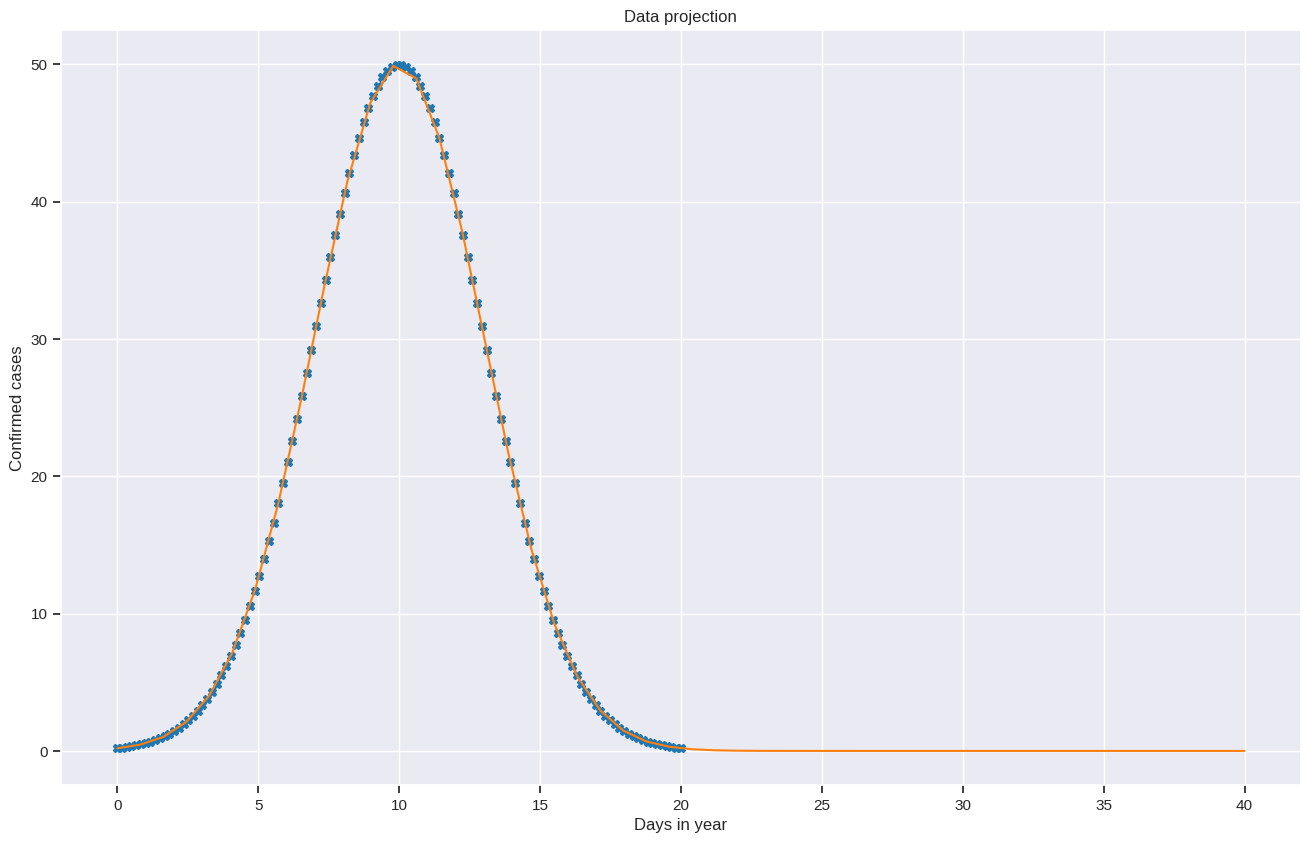

In [77]:
show_gaussian_regression(x_values, y_values)

## Growth factors and PyMC3

In [78]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



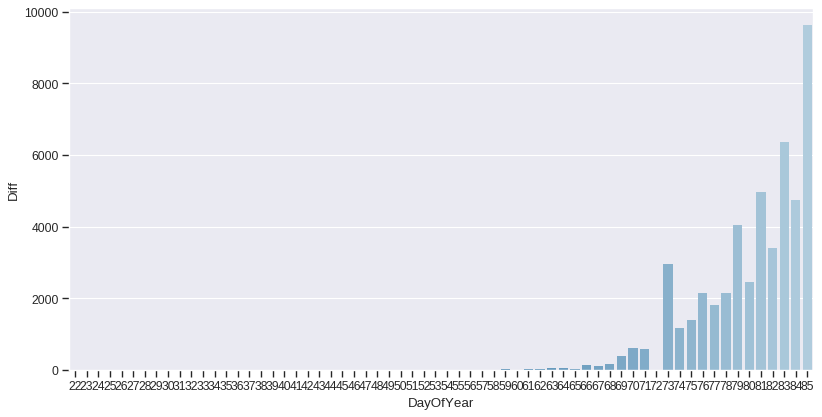

In [79]:
#fit_df = china_henan_df

fit_df = spain_df
#fit_df = germany_df

#fit_df = all_data_df[(all_data_df["Country/Region"] == 'Croatia')]

fit_df['Diff'] = fit_df['Confirmed'].diff()
fit_df['GrowthFactor'] = fit_df['Diff'] / fit_df['Diff'].shift(-1)

sns.barplot(data=fit_df, x="DayOfYear", y="Diff", palette="Blues_d")

In [80]:
x = fit_df['DayOfYear'].fillna(0).values
y = fit_df['Diff'].fillna(0).values

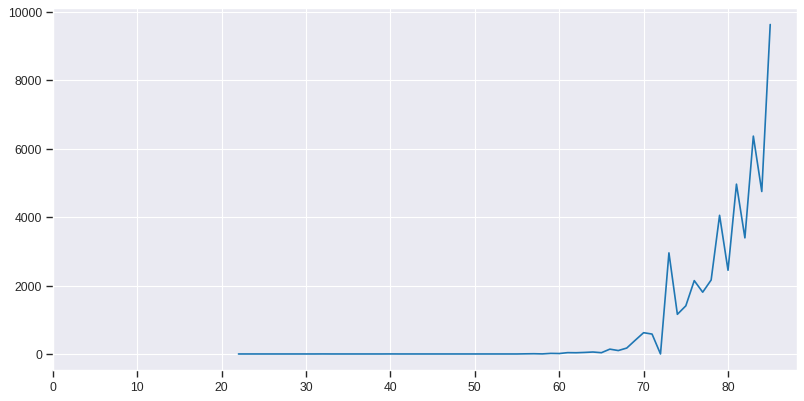

In [81]:
plt.plot(x, y)
plt.xlim(0, None)
plt.show()

Parameters: [-0.04610757 34.99962343  1.00104967]
RMSE: 1936.3280851137097
R-squared: 8.877544673824289e-07



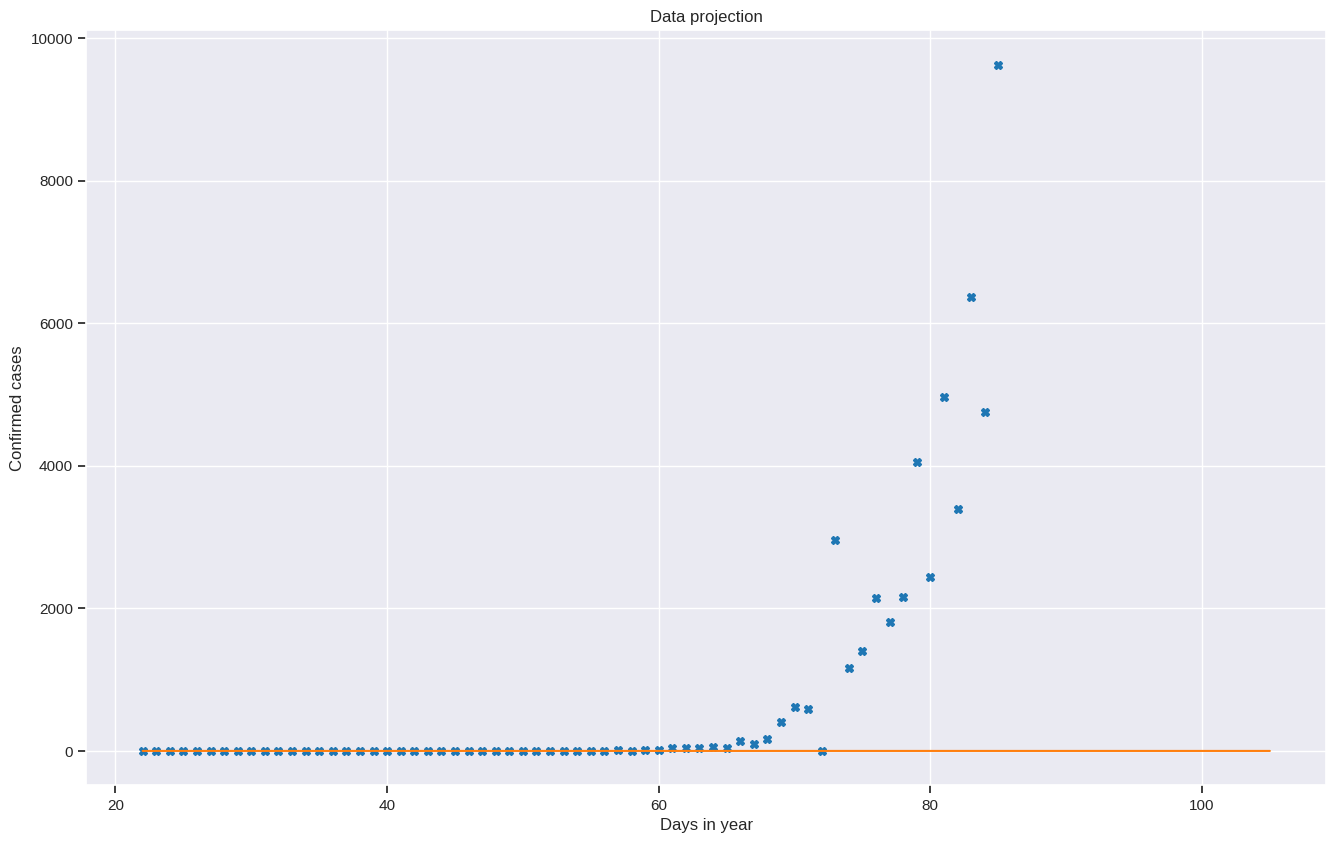

In [82]:
show_gaussian_regression(x, y, params=np.array([100.0, 35.0, 1.0]))

## Gaussian processes

* https://towardsdatascience.com/understanding-gaussian-process-the-socratic-way-ba02369d804
* https://juanitorduz.github.io/reg_bayesian_regression/

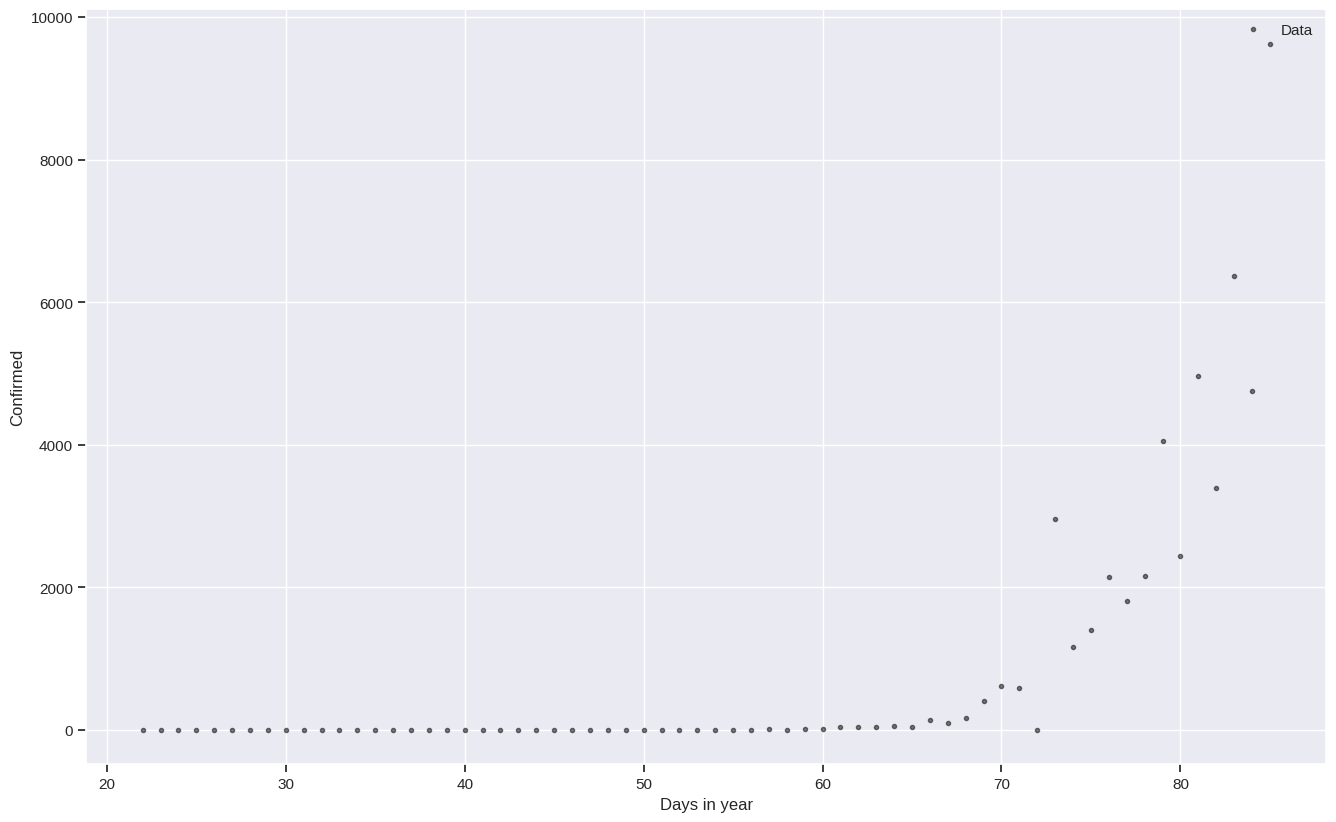

In [83]:
n = len(x) # The number of data points
X = x[:, None] # The inputs to the GP, they must be arranged as a column vector

## Plot the data and the unobserved latent function
fig = plt.figure(figsize=(16,10), dpi=100)
ax = fig.gca()

ax.plot(X, y, 'ok', ms=3, alpha=0.5, label="Data")
ax.set_xlabel("Days in year")
ax.set_ylabel("Confirmed");
plt.legend()

In [84]:
import theano.tensor as tt

def warp_func(x, a, b, c):
    return 1.0 + x + (a * tt.tanh(b * (x - c)))

with pm.Model() as model:
    #a = pm.Uniform('a')
    #b = pm.Uniform('b')
    #c = pm.Uniform('c')
    
    ℓ = pm.Gamma("ℓ", alpha=2, beta=1)
    η = pm.HalfCauchy("η", beta=5)
    
    cov_exp = η**2 * pm.gp.cov.Matern52(1, ℓ)
    #cov = pm.gp.cov.WarpedInput(1, warp_func=warp_func, args=(a,b,c), cov_func=cov_exp)
    
    gp = pm.gp.Marginal(cov_func=cov_exp)

    σ = pm.HalfCauchy("σ", beta=5)
    y_ = gp.marginal_likelihood("y", X=X, y=y, noise=σ)

    mp = pm.find_MAP()

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

In [85]:
# new values, we convert into column vector
X_new = np.linspace(50, 120, 40)[:,None]

# add the GP conditional to the model, given the new X values
with model:
    f_pred = gp.conditional("f_pred", X_new)

# To use the MAP values, you can just replace the trace with a length-1 list with `mp`
with model:
    pred_samples = pm.sample_posterior_predictive([mp], vars=[f_pred], samples=1000)

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

  0%|          | 0/1000 [00:00<?, ?it/s]/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` in

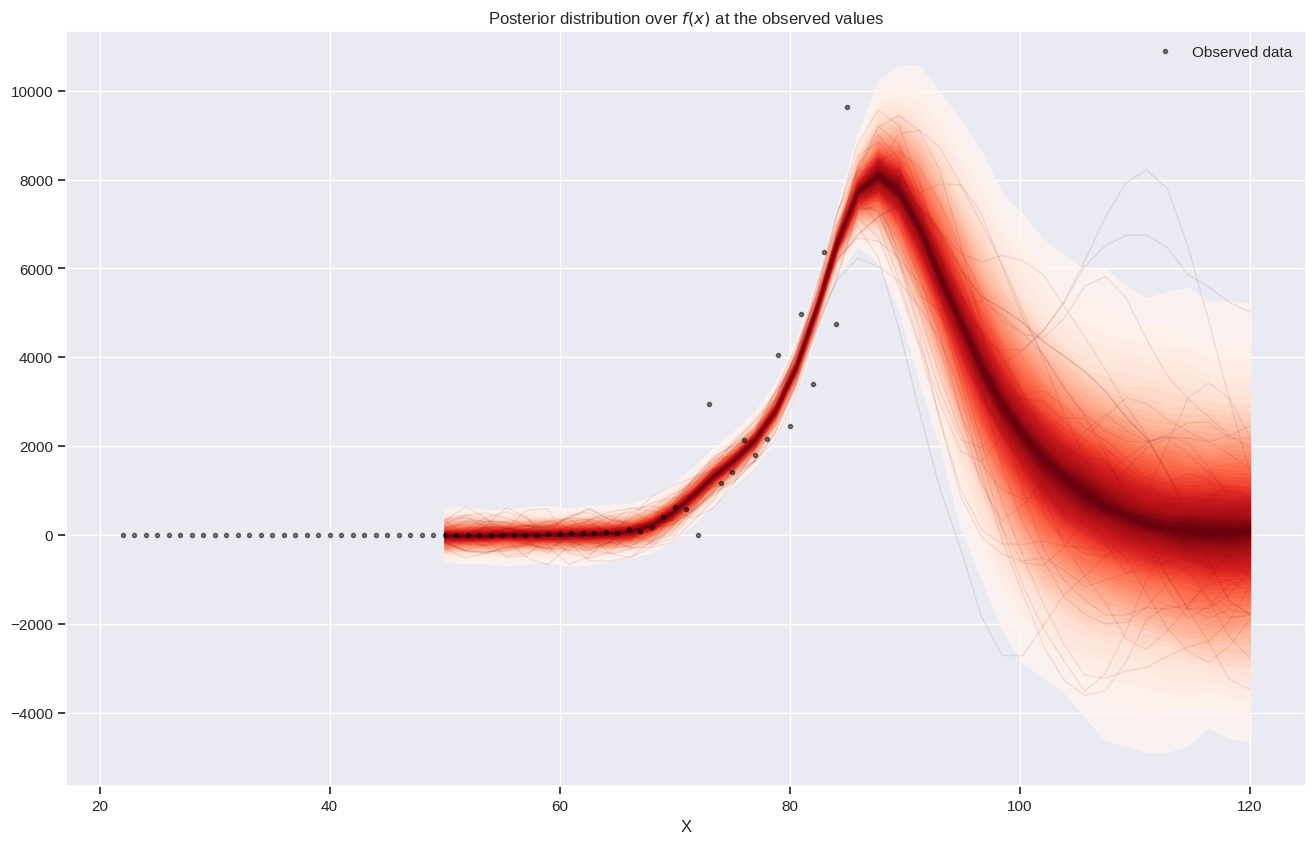

In [86]:
# plot the results
fig = plt.figure(figsize=(16,10), dpi=100)
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, pred_samples["f_pred"], X_new)

# plot the data and the true latent function
plt.plot(X, y, 'ok', ms=3, alpha=0.5, label="Observed data")

# axis labels and title
plt.xlabel("X")
plt.title("Posterior distribution over $f(x)$ at the observed values")
plt.legend()

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/home/ksaric/anaconda3/envs/covid-analysis/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

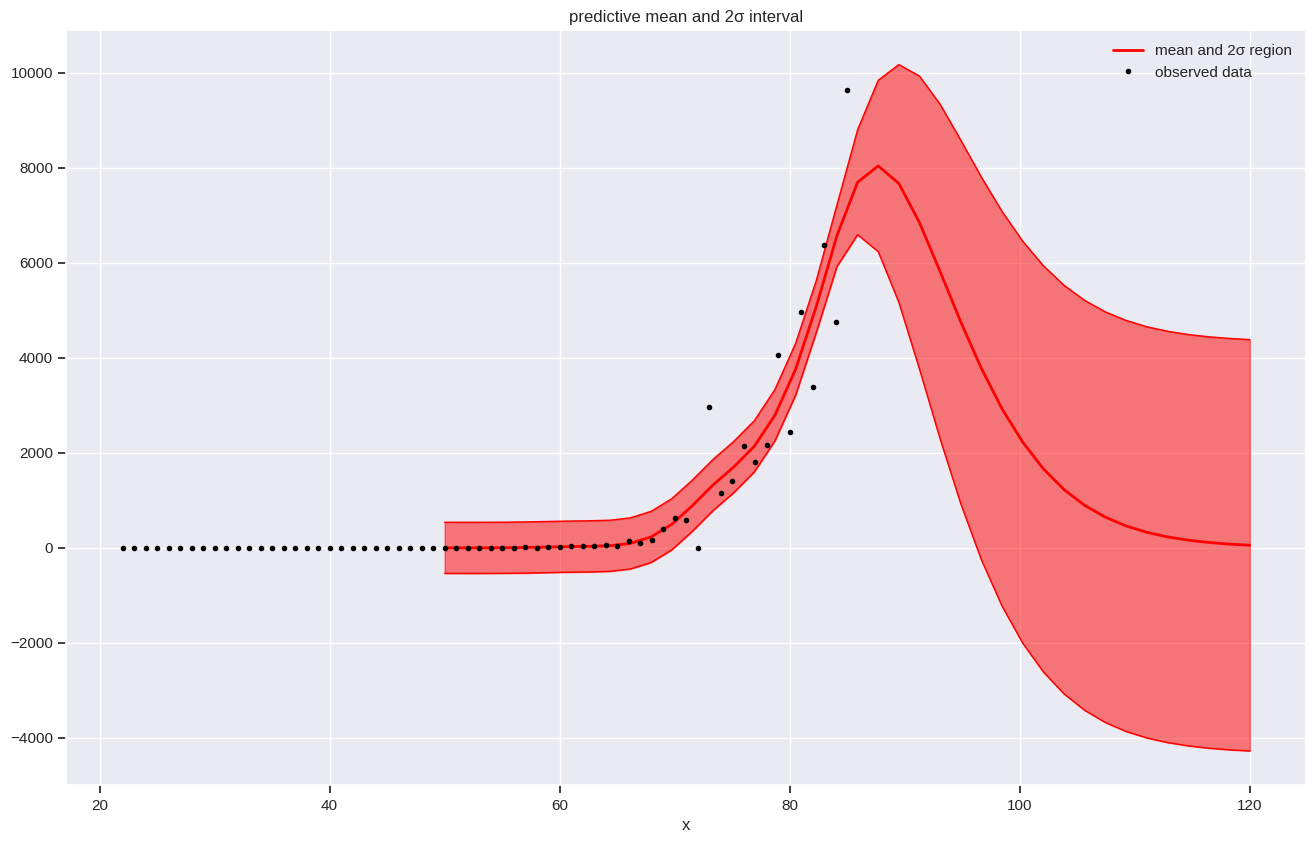

In [87]:
# predict
mu, var = gp.predict(X_new, point=mp, diag=True)
sd = np.sqrt(var)

# draw plot
fig = plt.figure(figsize=(16,10), dpi=100)
ax = fig.gca()

# plot mean and 2σ intervals
plt.plot(X_new, mu, 'r', lw=2, label="mean and 2σ region")
plt.plot(X_new, mu + 2*sd, 'r', lw=1)
plt.plot(X_new, mu - 2*sd, 'r', lw=1)
plt.fill_between(X_new.flatten(), mu - 2*sd, mu + 2*sd, color="r", alpha=0.5)

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data")

plt.xlabel("x")
plt.title("predictive mean and 2σ interval")
plt.legend()